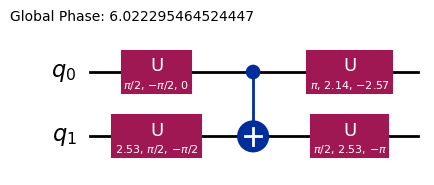

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
 
U = 0.5 * np.array([
    [1, 1, 1, 1],
    [-1, 1, -1, 1],
    [-1, -1, 1, 1],
    [-1, 1, 1, -1]
])
 
circuit = QuantumCircuit(2)
circuit.unitary(U, circuit.qubits)
circuit.draw('mpl')

In [6]:
from qiskit.quantum_info import Operator
 
# compute unitary matrix of circuit
U = Operator(circuit)
 
# re-synthesize
better_circuit = QuantumCircuit(2)
better_circuit.unitary(U, [0,1])
better_circuit.decompose().draw()
U

Operator([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
          [-0.5+0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j],
          [-0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j],
          [-0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [18]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler as Sampler

qc = QuantumCircuit(3)
qc.x(1)
qc.measure_all()
 
job = Sampler().run([qc])
result = job.result()
print(f" > Counts: {result[0].data.meas.get_counts()}")

 > Counts: {'010': 1024}
